### Загрузка и обзор данных

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv', sep=',')
orders = pd.read_csv('/datasets/orders.csv', sep=',')
visitors = pd.read_csv('/datasets/visitors.csv', sep=',')

In [3]:
hypothesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [5]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

In [8]:
orders.duplicated().sum()

0

In [9]:
gr_a = orders[orders['group']=='A']['visitorId']
gr_a.count().sum()

557

In [10]:
gr_b = orders[orders['group']=='B']['visitorId']
gr_b.count().sum()

640

количество пользователей в каждой группе - по таблице с заказами отличается на 83.

In [11]:
cnt = 0
for i in gr_a:
    if i in gr_b:
        cnt += 1
print(cnt)

0


Никакие пользователи в обе группы по таблице с заказами не попадают.

In [12]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [13]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [14]:
visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [15]:
visitors.duplicated().sum()

0

In [16]:
print(visitors['date'].min(),
visitors['date'].max())


2019-08-01 2019-08-31


временной интервал, даты начала и окончания теста 2019-08-01 - 2019-08-31

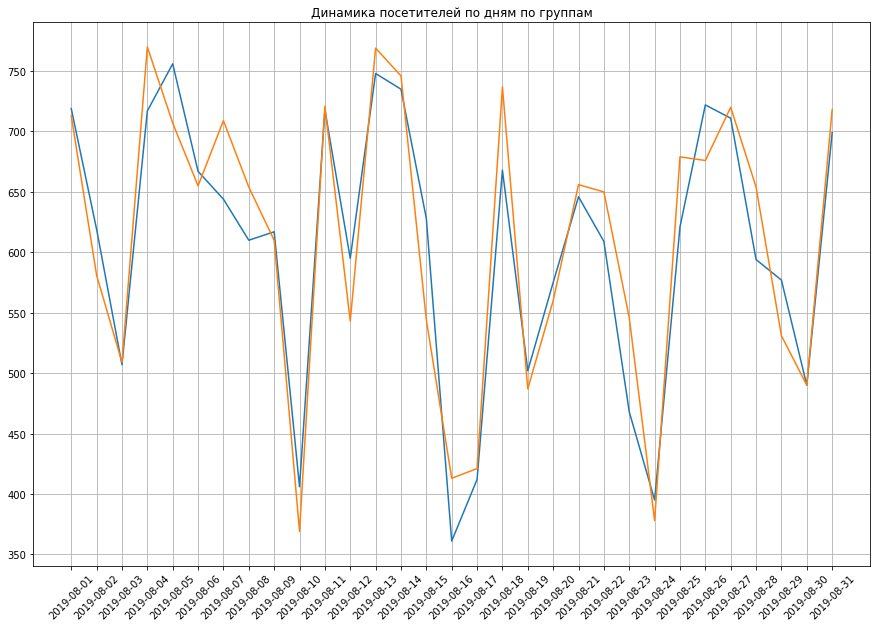

In [17]:
x = visitors[visitors['group']=='A']['date']
y = visitors[visitors['group']=='A']['visitors']
x2 = visitors[visitors['group']=='B']['date']
y2 = visitors[visitors['group']=='B']['visitors']

plt.figure(figsize=(15,10))
plt.title('Динамика посетителей по дням по группам')
plt.plot(x, y, x2, y2)
plt.xticks(rotation=45)
plt.grid()
plt.show()

Данные коректны. В загруженных таблицах отсутствуют пропуски и дубликаты. Однако необходимо привести столбцы с датой к нужному формату и для удобства привести название столбцов к нижнему регистру. 

Даты начала и окончания теста 2019-08-01 - 2019-08-31. Никакие пользователи в обе группы по таблице с заказами не попадают. Динамика посетителей по дням по группам показывает резкие скачки пользователей, график идет вниз от понедельника к пятнице и резко растет на выходных днях.

### Предобработка данных

In [18]:
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = ['transaction_id','visitor_id','date','revenue','group']

In [1]:
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

NameError: name 'orders' is not defined

Теперь данные готовы для дальнейшего анализа.

### Приоритезация гипотез

In [38]:
#фреймворк ICE
pd.options.display.max_colwidth = 130

hypothesis['ICE'] = (hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis_new = pd.DataFrame()
hypothesis_new = hypothesis[['hypothesis', 'ICE']]
hypothesis_new = hypothesis_new.sort_values(by='ICE',ascending=False)
hypothesis_new['ICE'] = round(hypothesis_new['ICE'],2)
display(hypothesis_new)



,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Приоритезация гипотиз по ICE показывает, что самые востребованные для нас гипотезы с индексами (8, 0, 7). 

In [21]:
# фреймворк RICE

hypothesis['RICE'] = (hypothesis['reach']*hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
hypothesis_new = pd.DataFrame()
hypothesis_new = hypothesis[['hypothesis', 'RICE']]
hypothesis_new = hypothesis_new.sort_values(by='RICE',ascending=False)
display(hypothesis_new)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Приоритезация гипотиз по ICE показывает, что самые востребованные для нас гипотезы с индексами (7, 2, 0).
Разлиция в фрейворках происходит в связи с тем, что в RICE мы учитываем параметр с количеством пользователей, которых затронет наши изменения. Учитывая лучшие оценки параметров и количество затронутых пользователей, мы можем установить, что стоит прорабатывать гипотезу с индексом 7, а именно "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".


### Анализ A/B-теста

#### График кумулятивной выручки по группам

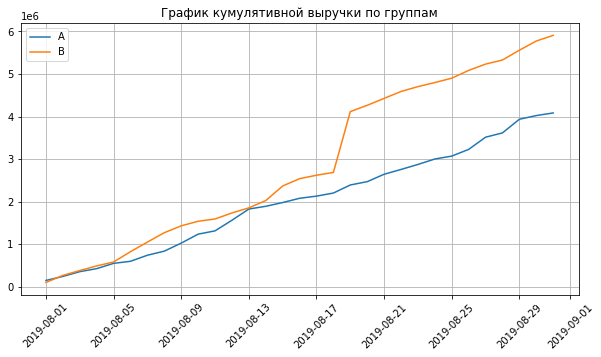

In [22]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': 'nunique',
            'visitor_id': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.figure(figsize=(10,5))

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

Заметен рост обеих груп на протяжении всего теста. С самого начала группа 'B' имеет более высокие показатели. C 17 августа наблюдается резкий скачок, где сегмент B значительно вырвался вперед и продалжал расти. 
Можно предположить, что мы не вполне понимаем всю картину. Скорее всего это связано с аномально большим заказом. Необходимо проверить данные на наличие выбросов и аномалий. 

####  График кумулятивного среднего чека по группам

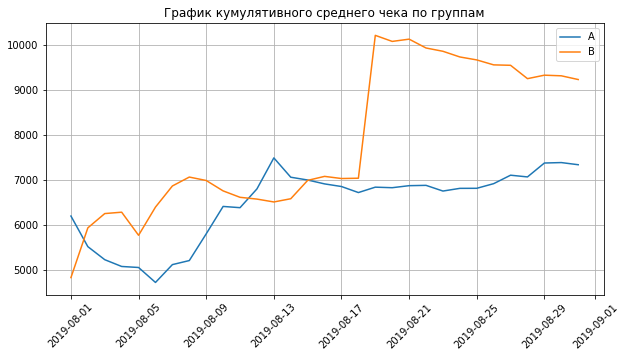

In [23]:
plt.figure(figsize=(10,5))
plt.title('График кумулятивного среднего чека по группам')
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

Кумулятивные значения среднего чека имеют большие колебания. Изначально сегмент группы B имел постепенный рост и стабилизировался на отметке в 7000. После произошел резкий скачок до 10000 на отметке около 17 августа 2019.
Группа А первую неделю падала, потом с 5 августа начала стабильно расти и стабилизировалась на отметке в 7000 примерно к 13 августа.
Принимать решение по этой метрике рано. Необходимо провести дальнейший анализ аномалий, которые искажают результат. Скорее всего они являются причиной скачка в группе Б.

#### График относительного изменения кумулятивного среднего чека группы B к группе A

No handles with labels found to put in legend.


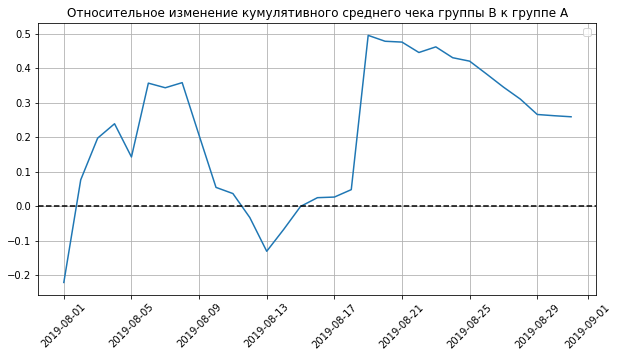

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе А')

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

В некоторые даты значения сильно менялись, видимо тогда и были совершены аномальные заказы. Стоит обратить внимание на числа от 17 до 21 августа.

#### График кумулятивного среднего количества заказов на посетителя по группам

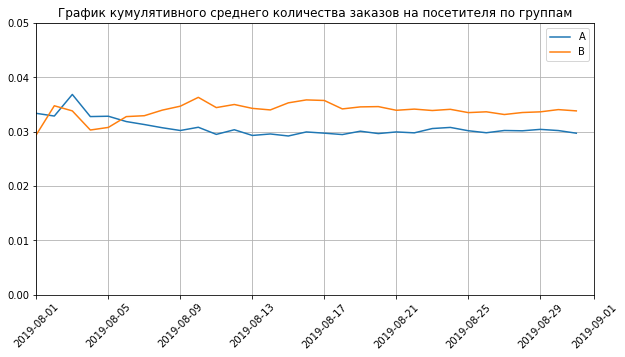

In [25]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(10,5))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0, 0.05])

plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()

Примерно после 10ти дней от начала теста колебания прекратились и обе группы зафиксировались на своих точках. Сегмент B имеет стабильно большую конверсию хоть и вначале уступал сегменту A.

#### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

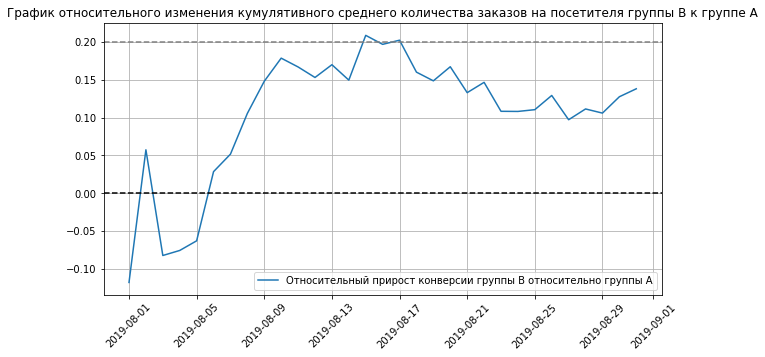

In [26]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(10,5))
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')


plt.grid()
plt.xticks(rotation=45)
plt.legend()
plt.show()




В первый день конверсия резко пошла вверх, но уже на второй день упала, после чего начала стремительно расти с 5го дня. Конверсия B резко выросла и в дальнейшем, находилась значительно выше, чем у сегмента A. Можно зафиксировать прирост примерно в 15%.

#### Точечный график количества заказов по пользователям

In [27]:
ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)
ordersByUsers.columns = ['visitor_id', 'transaction_id']

print(ordersByUsers.sort_values(by='transaction_id', ascending=False).head(10))


      visitor_id  transaction_id
1023  4256040402              11
591   2458001652              11
569   2378935119               9
487   2038680547               8
44     199603092               5
744   3062433592               5
55     237748145               5
917   3803269165               5
299   1230306981               5
897   3717692402               5


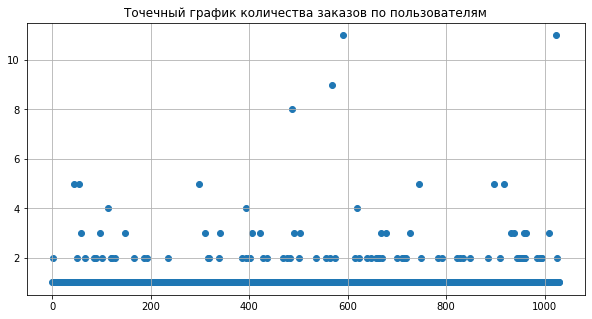

In [28]:
# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0,len(ordersByUsers)))

plt.figure(figsize=(10,5))
plt.title('Точечный график количества заказов по пользователям')

plt.scatter(x_values, ordersByUsers['transaction_id'])

plt.grid()
plt.show()

По графику видно, что подавляющее большинство пользователей не делали больше двух заказов. При этом есть исключение по 5 - 11 заказов, которые можно считать аномальными. 

#### 95-й и 99-й перцентили количества заказов на пользователя

In [29]:
print(np.percentile(ordersByUsers['transaction_id'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершали больше 2х заказов. Не более 1% пользователей совершали более 4х. В основном пользователи совершают 1-2 заказа, возьмем за крайнее значение аномалий пользователей, кто сделал не более 3х заказов.

####  Точечный график стоимостей заказов

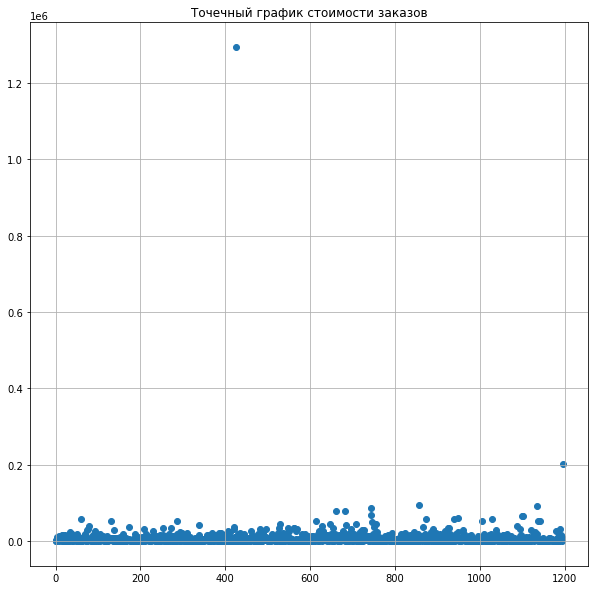

In [30]:
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(10,10))
plt.title('Точечный график стоимости заказов')

plt.scatter(x_values, orders['revenue'])

plt.grid()
plt.show()

Есть выбросы на отметке 200 тысяч и 1250000. Заказа выше миллиона определенно аномальный. В среднем все чеки примерно в одной ценовой категории.

#### 95-й и 99-й перцентили стоимости заказов

In [31]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


Не более 5% чеков на сумму более 28000р и не более 1% с суммой больше 58233. Посколку около 4% чеков все еще в приемлемом диапозоне суммы заказа, возьмем за крайнее значение для аномалий - 58233р.

Оценив результаты A/B-теста визуально можно сказать, что в данных, есть выбросы.
Обозначена граница для их определения.

Аномалиями можно считать пользователей, совершивших более трех заказов и чеки с суммой заказа 58233р.



#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами между группами между группами по «сырым» данным

Формулируем гипотезы. Нулевая: Статистически значемых различий в среднем количестве заказов на посетителя между группами по "сырым" данным нет. Альтернативная: Статистически значемые различия в среднем количестве заказов на посетителя между группами по "сырым" данным есть.

In [32]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [33]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("Показатель 'B' к 'А'= {0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value = 0.01679
Показатель 'B' к 'А'= 0.138


Значение p-value меньше 0.05, значит нулевую гипотезу, что различий по "сырым" данным нет, отвергаем. Следовательно различия между группами есть. Относительное значение разницы конверсий между группами 13,8%.

#### Статистическая значимость различий в среднем чеке заказа между группами между группами по «сырым» данным

формулируем гипотезы. Нулевая: Статистически значемых различий в среднем чеке заказа между группами по "сырым" данным нет. Альтернативная: Статистически значемые различия в среднем чеке заказа между группами по "сырым" данным есть.

In [34]:
print("p-value = {0:.3f}".format(
    stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                       orders[orders['group']=='B']['revenue'])[1]))

print("Показатель 'B' к 'А'= {0:.3f}".format(
    orders[orders['group']=='B']['revenue'].mean()/
    orders[orders['group']=='A']['revenue'].mean()-1))

p-value = 0.729
Показатель 'B' к 'А'= 0.259


p-value значительно выше 0.05. Следовательно нулевую гипотезу о том, что нет различий в среднем чеке заказа по "сырым" данным, не отвергаем. 
Различия в среднем чеке составляют 26%. Однако наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.

#### Статистическая значимость различий в среднем количестве заказов на посетителя между группами между группами по «очищенным» данным

Формулируем гипотезы. Нулевая: Статистически значемых различий в среднем количестве заказов на посетителя между группами по "очищенным" данным нет. Альтернативная: Статистически значемые различия в среднем количестве заказов на посетителя между группами по "очищенным" данным есть.

In [35]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'],99)]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)


In [36]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print("p-value = {0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Показатель 'B' к 'А'= {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

p-value = 0.014
Показатель 'B' к 'А'= 0.151


Значение p-value меньше 0.05, значит нулевую гипотезу, что различий количества заказов на посетителя по "очищенным" данным нет, отвергаем. Следовательно различия между группами есть. Относительное значение разницы между группами составляет 15%.

#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

формулируем гипотезы. Нулевая: Статистически значемых различий в среднем чеке заказа между группами по "очищенным" данным нет. Альтернативная: Статистически значемые различия в среднем чеке заказа между группами по "очищенным" данным есть.

In [37]:
print(
    "p-value = {0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "Показатель 'B' к 'А'= {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

p-value = 0.959
Показатель 'B' к 'А'= -0.014


p-value значительно выше 0.05. Следовательно нулевую гипотезу о том, что нет различий в среднем чеке заказа по "очищенным" данным, не отвергаем. Различий в среднем чеке практически нет - 1.4%. 

#### Решение по результатам теста

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий.
По "сырым" данным разницы конверсий между группами 13,8%, а по очищенным 15%.

По очищенным данным нет статистически значимого различия по среднему чеку между группами - 1.4% различий. Однако с учетом аномалий статистически значимое различие есть. Различия в среднем чеке составляют 26%, но наблюдаемые различия не являются значимыми при таком уровне значимости, а следовательно были получены случайно.
График различия конверсии между группами сообщает, что результаты группы B лучше группы A: имеют тенденцию к росту, либо зафиксировались около среднего значения.

Исходя из фактов выше, следует принять решение остановить тестирование и признать его успешным. Группа B значительно эффективнее по конверсии при примерно одинаковых значениях среднего чека.

### Общий вывод

На этапе обзора данных мной установлено, что данные коректны. В них отсутствуют пропуски и дубликаты. Никакие пользователи в обе группы по таблице с заказами не попадают. Количество пользователей в каждой группе - по таблице с заказами отличается на 83. Даты начала и окончания теста 2019-08-01 - 2019-08-31.
Динамика посетителей по дням по группам показывает резкие скачки пользователей, график идет вниз от понедельника к пятнице и резко растет на выходных днях.

На этапе предобработки, для дальнейшего анализа столбцы с датой к приведены нужному формату и для удобства изменены названия столбцов к нижнему регистру.

На этапе приоритезации: учитывая лучшие оценки параметров и количество затронутых пользователей, установлено, что стоит прорабатывать гипотезу с индексом 7, а именно "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

На основе анализа кумулятивных значения среднего чека и кумулятивной выручки обеих груп установлено, что в некоторые даты значения сильно менялись, это связано с аномальными значениями. 

Для "очистки" данных установлено, что основном пользователи совершают 1-2 заказа, поэтому за крайнее значение аномалий оставили пользователей, кто сделал не более 3х заказов. Также аномалиями можно считать пользователей, совершивших более трех заказов и чеки с суммой заказа 58233р.

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. По "сырым" данным разницы конверсий между группами 13,8%, а по очищенным 15%.

На основе выше перечисленного, принято решение остановить тестирование и признать его успешным. Группа B значительно эффективнее по конверсии при примерно одинаковых значениях среднего чека.

